In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/who-is-the-real-winner/sample_submission.csv
/kaggle/input/who-is-the-real-winner/train.csv
/kaggle/input/who-is-the-real-winner/test.csv


# Import Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

# Import Data

In [3]:
train_df = pd.read_csv('/kaggle/input/who-is-the-real-winner/train.csv')
train_df

,ID,Candidate,Constituency ∇,Party,Criminal Case,Total Assets,Liabilities,state,Education
0,0,M.K. Mohan,ANNA NAGAR,DMK,4,211 Crore+,2 Crore+,TAMIL NADU,8th Pass
1,1,Khatik Ramesh Prasad,KARERA (SC),BJP,0,1 Crore+,0,MADHYA PRADESH,12th Pass
2,2,Dr. Mantar Gowda,MADIKERI,INC,0,7 Crore+,22 Lac+,KARNATAKA,Post Graduate
3,3,Kundan Kumar,BEGUSARAI,BJP,0,9 Crore+,24 Lac+,BIHAR,Post Graduate
4,4,Swapan Majumder,BANGAON DAKSHIN (SC),BJP,2,2 Crore+,61 Lac+,WEST BENGAL,8th Pass
...,...,...,...,...,...,...,...,...,...
2054,2054,V. Sasi,CHIRAYINKEEZHU,CPI,1,61 Lac+,10 Lac+,KERALA,Graduate Professional
2055,2055,Pushkar Lal Dangi,MAVLI,INC,0,2 Crore+,8 Lac+,RAJASTHAN,10th Pass
2056,2056,Dr. Manju Shiwach,MODI NAGAR,BJP,0,13 Crore+,85 Lac+,UTTAR PRADESH,Graduate
2057,2057,Mansing Fattesingrao Naik,SHIRALA,NCP,1,25 Crore+,94 Lac+,MAHARASHTRA,12th Pass


In [4]:
test_df = pd.read_csv('/kaggle/input/who-is-the-real-winner/test.csv')
test_df

,ID,Candidate,Constituency ∇,Party,Criminal Case,Total Assets,Liabilities,state
0,0,Geeta Bharat Jain,MEERA BHAYANDAR,IND,2,70 Crore+,11 Crore+,MAHARASHTRA
1,1,Becharam Manna,SINGUR,AITC,1,2 Crore+,13 Lac+,WEST BENGAL
2,2,Sunil Vijay Tingre,VADGAON SHERI,NCP,3,49 Crore+,1 Crore+,MAHARASHTRA
3,3,Asit Mazumder (Tapan),CHUNCHURA,AITC,1,2 Crore+,0,WEST BENGAL
4,4,Hriday Narayan Singh Patel,SAGRI,SP,0,16 Crore+,2 Crore+,UTTAR PRADESH
...,...,...,...,...,...,...,...,...
1369,1369,Niladri Sekhar Dana,BANKURA,BJP,0,1 Crore+,0,WEST BENGAL
1370,1370,Mukesh Kumar Pal,PALLAHARA,BJD,1,0,13 Lac+,ODISHA
1371,1371,Vijay Shanker Dubey,MAHARAJGANJ,INC,1,5 Crore+,0,BIHAR
1372,1372,Satpal Singh Satti,UNA,BJP,1,2 Crore+,5 Lac+,HIMACHAL PRADESH


# Data Visualization

## Count of Education Labels

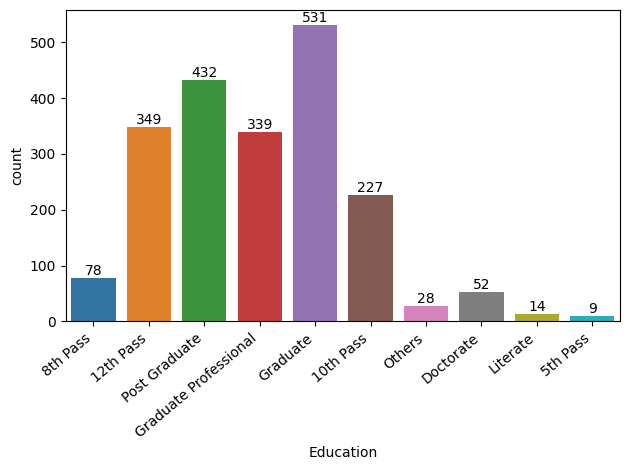

In [5]:
ax = sns.countplot(data=train_df, x="Education")
ax.bar_label(ax.containers[0])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()
# ax.figure.savefig("Edu_cnt.png")

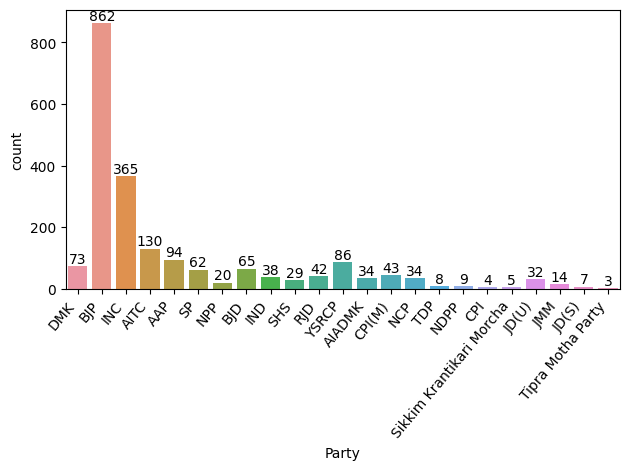

In [6]:
ax = sns.countplot(data=train_df, x="Party")
ax.bar_label(ax.containers[0])
ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha="right")
plt.tight_layout()
plt.show()
# ax.figure.savefig("Party_cnt.png")

In [7]:
print(train_df['Constituency ∇'].value_counts().to_frame())

                 count
Constituency ∇        
SAGAR                3
ISLAMPUR             3
SHIVAJINAGAR         2
JALALABAD            2
SHAHPUR              2
...                ...
KUPPAM               1
PANISAGAR            1
HALIYAL              1
ALLAHABAD NORTH      1
TALIHA               1

[2037 rows x 1 columns]


#### We need to convert **Total Assets** and **Liabilities** to numerical values for Data Visualization.

# Data preprocessing

#### Coverting **Total Assets** and **Liabilities** to numerical values for training data.

In [8]:
uniq = []
for i in train_df['Total Assets'].str.split():
    uniq.append(i[-1])

np.unique(uniq)

array(['0', 'Crore+', 'Lac+', 'Thou+'], dtype='<U6')

In [9]:
HtagAssets = []
for i in train_df['Total Assets'].str.split():
    x = i[-1]
    if(x=='0'): HtagAssets.append(0)
    elif(x=='Crore+'): HtagAssets.append(int(i[0])*10000000)
    elif(x=='Lac+'): HtagAssets.append(int(i[0])*100000)
    elif(x=='Thou+'): HtagAssets.append(int(i[0])*1000)

train_df['Total Assets'] = HtagAssets
train_df.head()

,ID,Candidate,Constituency ∇,Party,Criminal Case,Total Assets,Liabilities,state,Education
0,0,M.K. Mohan,ANNA NAGAR,DMK,4,2110000000,2 Crore+,TAMIL NADU,8th Pass
1,1,Khatik Ramesh Prasad,KARERA (SC),BJP,0,10000000,0,MADHYA PRADESH,12th Pass
2,2,Dr. Mantar Gowda,MADIKERI,INC,0,70000000,22 Lac+,KARNATAKA,Post Graduate
3,3,Kundan Kumar,BEGUSARAI,BJP,0,90000000,24 Lac+,BIHAR,Post Graduate
4,4,Swapan Majumder,BANGAON DAKSHIN (SC),BJP,2,20000000,61 Lac+,WEST BENGAL,8th Pass


In [10]:
uniq = []
for i in train_df['Liabilities'].str.split():
    uniq.append(i[-1])

np.unique(uniq)

array(['0', 'Crore+', 'Hund+', 'Lac+', 'Thou+'], dtype='<U6')

In [11]:
HtagLiabilities = []
for i in train_df['Liabilities'].str.split():
    x = i[-1]
    if(x=='0'): HtagLiabilities.append(0)
    elif(x=='Crore+'): HtagLiabilities.append(int(i[0])*10000000)
    elif(x=='Lac+'): HtagLiabilities.append(int(i[0])*100000)
    elif(x=='Thou+'): HtagLiabilities.append(int(i[0])*1000)
    elif(x=='Hund+'): HtagLiabilities.append(int(i[0])*100)

train_df['Liabilities'] = HtagLiabilities
train_df.head()

,ID,Candidate,Constituency ∇,Party,Criminal Case,Total Assets,Liabilities,state,Education
0,0,M.K. Mohan,ANNA NAGAR,DMK,4,2110000000,20000000,TAMIL NADU,8th Pass
1,1,Khatik Ramesh Prasad,KARERA (SC),BJP,0,10000000,0,MADHYA PRADESH,12th Pass
2,2,Dr. Mantar Gowda,MADIKERI,INC,0,70000000,2200000,KARNATAKA,Post Graduate
3,3,Kundan Kumar,BEGUSARAI,BJP,0,90000000,2400000,BIHAR,Post Graduate
4,4,Swapan Majumder,BANGAON DAKSHIN (SC),BJP,2,20000000,6100000,WEST BENGAL,8th Pass


#### Coverting **Total Assets** and **Liabilities** to numerical values for testing data.

In [12]:
uniq = []
for i in test_df['Total Assets'].str.split():
    uniq.append(i[-1])

np.unique(uniq)

array(['0', 'Crore+', 'Lac+', 'Thou+'], dtype='<U6')

In [13]:
HtagAssets = []
for i in test_df['Total Assets'].str.split():
    x = i[-1]
    if(x=='0'): HtagAssets.append(0)
    elif(x=='Crore+'): HtagAssets.append(int(i[0])*10000000)
    elif(x=='Lac+'): HtagAssets.append(int(i[0])*100000)
    elif(x=='Thou+'): HtagAssets.append(int(i[0])*1000)

test_df['Total Assets'] = HtagAssets
test_df.head()

,ID,Candidate,Constituency ∇,Party,Criminal Case,Total Assets,Liabilities,state
0,0,Geeta Bharat Jain,MEERA BHAYANDAR,IND,2,700000000,11 Crore+,MAHARASHTRA
1,1,Becharam Manna,SINGUR,AITC,1,20000000,13 Lac+,WEST BENGAL
2,2,Sunil Vijay Tingre,VADGAON SHERI,NCP,3,490000000,1 Crore+,MAHARASHTRA
3,3,Asit Mazumder (Tapan),CHUNCHURA,AITC,1,20000000,0,WEST BENGAL
4,4,Hriday Narayan Singh Patel,SAGRI,SP,0,160000000,2 Crore+,UTTAR PRADESH


In [14]:
uniq = []
for i in test_df['Liabilities'].str.split():
    uniq.append(i[-1])

np.unique(uniq)

array(['0', 'Crore+', 'Lac+', 'Thou+'], dtype='<U6')

In [15]:
HtagLiabilities = []
for i in test_df['Liabilities'].str.split():
    x = i[-1]
    if(x=='0'): HtagLiabilities.append(0)
    elif(x=='Crore+'): HtagLiabilities.append(int(i[0])*10000000)
    elif(x=='Lac+'): HtagLiabilities.append(int(i[0])*100000)
    elif(x=='Thou+'): HtagLiabilities.append(int(i[0])*1000)
    elif(x=='Hund+'): HtagLiabilities.append(int(i[0])*100)

test_df['Liabilities'] = HtagLiabilities
test_df.head()

,ID,Candidate,Constituency ∇,Party,Criminal Case,Total Assets,Liabilities,state
0,0,Geeta Bharat Jain,MEERA BHAYANDAR,IND,2,700000000,110000000,MAHARASHTRA
1,1,Becharam Manna,SINGUR,AITC,1,20000000,1300000,WEST BENGAL
2,2,Sunil Vijay Tingre,VADGAON SHERI,NCP,3,490000000,10000000,MAHARASHTRA
3,3,Asit Mazumder (Tapan),CHUNCHURA,AITC,1,20000000,0,WEST BENGAL
4,4,Hriday Narayan Singh Patel,SAGRI,SP,0,160000000,20000000,UTTAR PRADESH


# Data Visualization

## Check if any column contains **NaN** values

In [16]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID              2059 non-null   int64 
 1   Candidate       2059 non-null   object
 2   Constituency ∇  2059 non-null   object
 3   Party           2059 non-null   object
 4   Criminal Case   2059 non-null   int64 
 5   Total Assets    2059 non-null   int64 
 6   Liabilities     2059 non-null   int64 
 7   state           2059 non-null   object
 8   Education       2059 non-null   object
dtypes: int64(4), object(5)
memory usage: 144.9+ KB


#### Therefore, we can see that none of the values are **NaN**, so we do not need to handle it differently.

In [17]:
train_df_mod = train_df
train_df_mod.head()

,ID,Candidate,Constituency ∇,Party,Criminal Case,Total Assets,Liabilities,state,Education
0,0,M.K. Mohan,ANNA NAGAR,DMK,4,2110000000,20000000,TAMIL NADU,8th Pass
1,1,Khatik Ramesh Prasad,KARERA (SC),BJP,0,10000000,0,MADHYA PRADESH,12th Pass
2,2,Dr. Mantar Gowda,MADIKERI,INC,0,70000000,2200000,KARNATAKA,Post Graduate
3,3,Kundan Kumar,BEGUSARAI,BJP,0,90000000,2400000,BIHAR,Post Graduate
4,4,Swapan Majumder,BANGAON DAKSHIN (SC),BJP,2,20000000,6100000,WEST BENGAL,8th Pass


In [18]:
train_df_plot = train_df
train_df_plot.head() # Used for plotting

,ID,Candidate,Constituency ∇,Party,Criminal Case,Total Assets,Liabilities,state,Education
0,0,M.K. Mohan,ANNA NAGAR,DMK,4,2110000000,20000000,TAMIL NADU,8th Pass
1,1,Khatik Ramesh Prasad,KARERA (SC),BJP,0,10000000,0,MADHYA PRADESH,12th Pass
2,2,Dr. Mantar Gowda,MADIKERI,INC,0,70000000,2200000,KARNATAKA,Post Graduate
3,3,Kundan Kumar,BEGUSARAI,BJP,0,90000000,2400000,BIHAR,Post Graduate
4,4,Swapan Majumder,BANGAON DAKSHIN (SC),BJP,2,20000000,6100000,WEST BENGAL,8th Pass


In [19]:
test_df_mod = test_df
test_df_mod.head()

,ID,Candidate,Constituency ∇,Party,Criminal Case,Total Assets,Liabilities,state
0,0,Geeta Bharat Jain,MEERA BHAYANDAR,IND,2,700000000,110000000,MAHARASHTRA
1,1,Becharam Manna,SINGUR,AITC,1,20000000,1300000,WEST BENGAL
2,2,Sunil Vijay Tingre,VADGAON SHERI,NCP,3,490000000,10000000,MAHARASHTRA
3,3,Asit Mazumder (Tapan),CHUNCHURA,AITC,1,20000000,0,WEST BENGAL
4,4,Hriday Narayan Singh Patel,SAGRI,SP,0,160000000,20000000,UTTAR PRADESH


#### Obviously, Education will not depend on **ID** and **Candidate** column. Therefore we can drop these columns.

In [20]:
train_df_mod.drop(columns=['ID','Candidate'], inplace=True)
train_df_mod.head()

,Constituency ∇,Party,Criminal Case,Total Assets,Liabilities,state,Education
0,ANNA NAGAR,DMK,4,2110000000,20000000,TAMIL NADU,8th Pass
1,KARERA (SC),BJP,0,10000000,0,MADHYA PRADESH,12th Pass
2,MADIKERI,INC,0,70000000,2200000,KARNATAKA,Post Graduate
3,BEGUSARAI,BJP,0,90000000,2400000,BIHAR,Post Graduate
4,BANGAON DAKSHIN (SC),BJP,2,20000000,6100000,WEST BENGAL,8th Pass


In [21]:
test_df_mod.drop(columns=['ID','Candidate'], inplace=True)
test_df_mod.head()

,Constituency ∇,Party,Criminal Case,Total Assets,Liabilities,state
0,MEERA BHAYANDAR,IND,2,700000000,110000000,MAHARASHTRA
1,SINGUR,AITC,1,20000000,1300000,WEST BENGAL
2,VADGAON SHERI,NCP,3,490000000,10000000,MAHARASHTRA
3,CHUNCHURA,AITC,1,20000000,0,WEST BENGAL
4,SAGRI,SP,0,160000000,20000000,UTTAR PRADESH


In [22]:
print("Unique values in Constituency: " + str(len(pd.unique(train_df_mod['Constituency ∇']))))
print("Total rows of data given: " + str(len(train_df_mod)))

Unique values in Constituency: 2037
Total rows of data given: 2059


#### Constituency ∇ is also almost unique for each data point. Therefore, it won't be very useful for training the model and we can drop it.

In [23]:
train_df_mod.drop(columns=['Constituency ∇'], inplace=True)
train_df_mod.head()

,Party,Criminal Case,Total Assets,Liabilities,state,Education
0,DMK,4,2110000000,20000000,TAMIL NADU,8th Pass
1,BJP,0,10000000,0,MADHYA PRADESH,12th Pass
2,INC,0,70000000,2200000,KARNATAKA,Post Graduate
3,BJP,0,90000000,2400000,BIHAR,Post Graduate
4,BJP,2,20000000,6100000,WEST BENGAL,8th Pass


In [24]:
test_df_mod.drop(columns=['Constituency ∇'], inplace=True)
test_df_mod.head()

,Party,Criminal Case,Total Assets,Liabilities,state
0,IND,2,700000000,110000000,MAHARASHTRA
1,AITC,1,20000000,1300000,WEST BENGAL
2,NCP,3,490000000,10000000,MAHARASHTRA
3,AITC,1,20000000,0,WEST BENGAL
4,SP,0,160000000,20000000,UTTAR PRADESH


## One Hot Encoding

In [25]:
tdf1 = pd.get_dummies(train_df_mod['state'])
train_df_mod = train_df_mod.join(tdf1)
train_df_mod.drop(columns=['state'], inplace=True)
train_df_mod.head()

,Party,Criminal Case,Total Assets,Liabilities,Education,ANDHRA PRADESH,ARUNACHAL PRADESH,ASSAM,BIHAR,CHHATTISGARH,...,ODISHA,PUDUCHERRY,PUNJAB,RAJASTHAN,SIKKIM,TAMIL NADU,TRIPURA,UTTAR PRADESH,UTTARAKHAND,WEST BENGAL
0,DMK,4,2110000000,20000000,8th Pass,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
1,BJP,0,10000000,0,12th Pass,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,INC,0,70000000,2200000,Post Graduate,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,BJP,0,90000000,2400000,Post Graduate,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
4,BJP,2,20000000,6100000,8th Pass,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [26]:
tdf2 = pd.get_dummies(train_df_mod['Party'])
train_df_mod = train_df_mod.join(tdf2)
train_df_mod.drop(columns=['Party'], inplace=True)
train_df_mod.head()

,Criminal Case,Total Assets,Liabilities,Education,ANDHRA PRADESH,ARUNACHAL PRADESH,ASSAM,BIHAR,CHHATTISGARH,DELHI,...,NCP,NDPP,NPP,RJD,SHS,SP,Sikkim Krantikari Morcha,TDP,Tipra Motha Party,YSRCP
0,4,2110000000,20000000,8th Pass,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,0,10000000,0,12th Pass,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,0,70000000,2200000,Post Graduate,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,0,90000000,2400000,Post Graduate,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2,20000000,6100000,8th Pass,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [27]:
tdf1 = pd.get_dummies(test_df_mod['state'])
test_df_mod = test_df_mod.join(tdf1)
test_df_mod.drop(columns=['state'], inplace=True)
test_df_mod.head()

,Party,Criminal Case,Total Assets,Liabilities,ANDHRA PRADESH,ARUNACHAL PRADESH,ASSAM,BIHAR,CHHATTISGARH,DELHI,...,ODISHA,PUDUCHERRY,PUNJAB,RAJASTHAN,SIKKIM,TAMIL NADU,TRIPURA,UTTAR PRADESH,UTTARAKHAND,WEST BENGAL
0,IND,2,700000000,110000000,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,AITC,1,20000000,1300000,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,NCP,3,490000000,10000000,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,AITC,1,20000000,0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,SP,0,160000000,20000000,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [28]:
tdf2 = pd.get_dummies(test_df_mod['Party'])
test_df_mod = test_df_mod.join(tdf2)
test_df_mod.drop(columns=['Party'], inplace=True)
test_df_mod.head()

,Criminal Case,Total Assets,Liabilities,ANDHRA PRADESH,ARUNACHAL PRADESH,ASSAM,BIHAR,CHHATTISGARH,DELHI,GOA,...,NCP,NDPP,NPP,RJD,SHS,SP,Sikkim Krantikari Morcha,TDP,Tipra Motha Party,YSRCP
0,2,700000000,110000000,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1,20000000,1300000,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,490000000,10000000,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
3,1,20000000,0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,0,160000000,20000000,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


## Label Encoding

In [29]:
le = LabelEncoder()
train_df_mod['Education'] = le.fit_transform(train_df_mod['Education'])

train_df_mod.head()

,Criminal Case,Total Assets,Liabilities,Education,ANDHRA PRADESH,ARUNACHAL PRADESH,ASSAM,BIHAR,CHHATTISGARH,DELHI,...,NCP,NDPP,NPP,RJD,SHS,SP,Sikkim Krantikari Morcha,TDP,Tipra Motha Party,YSRCP
0,4,2110000000,20000000,3,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,0,10000000,0,1,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,0,70000000,2200000,9,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,0,90000000,2400000,9,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2,20000000,6100000,3,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## Correlation of all the columns

In [30]:
train_df_mod.corrwith(train_df_mod['Education']).sort_values(ascending=False)[1:]

UTTAR PRADESH               0.100315
NDPP                        0.054552
Tipra Motha Party           0.053749
NAGALAND                    0.050284
INC                         0.044707
CHHATTISGARH                0.041963
ODISHA                      0.039482
SP                          0.038892
TDP                         0.036609
BJD                         0.035144
RAJASTHAN                   0.030192
TAMIL NADU                  0.022978
GOA                         0.022201
MANIPUR                     0.021006
CPI                         0.018617
ASSAM                       0.014824
MADHYA PRADESH              0.013882
JD(S)                       0.013687
Liabilities                 0.009539
ANDHRA PRADESH              0.009014
DMK                         0.005874
PUNJAB                      0.005266
Sikkim Krantikari Morcha    0.004619
SIKKIM                      0.004619
Total Assets                0.003603
BJP                         0.002828
HIMACHAL PRADESH            0.001928
Y

# Plots

## Taking inverse of Education column for better labels

In [31]:
train_df_mod['Education'] = le.inverse_transform(train_df_mod['Education'])
train_df_mod.head()

,Criminal Case,Total Assets,Liabilities,Education,ANDHRA PRADESH,ARUNACHAL PRADESH,ASSAM,BIHAR,CHHATTISGARH,DELHI,...,NCP,NDPP,NPP,RJD,SHS,SP,Sikkim Krantikari Morcha,TDP,Tipra Motha Party,YSRCP
0,4,2110000000,20000000,8th Pass,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,0,10000000,0,12th Pass,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,0,70000000,2200000,Post Graduate,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,0,90000000,2400000,Post Graduate,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2,20000000,6100000,8th Pass,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## Total Assets vs Education

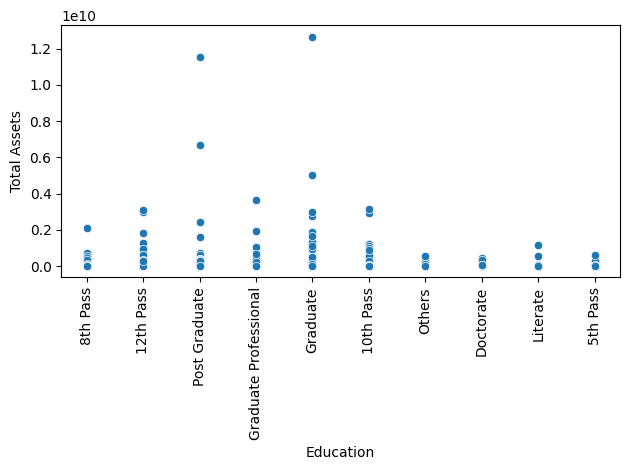

In [32]:
ax = sns.scatterplot(x="Education", y="Total Assets", data=train_df_mod)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
# ax.figure.savefig("Total_Ass_vs_Edu.png")

## Liabilities vs Education

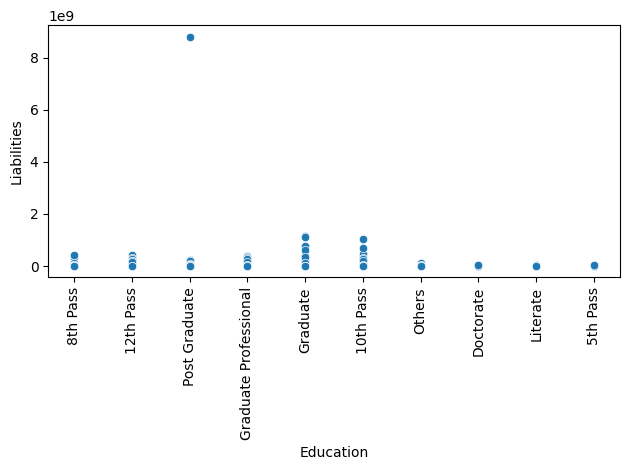

In [33]:
ax = sns.scatterplot(x="Education", y="Liabilities", data=train_df_mod)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
# ax.figure.savefig("Lia_vs_Edu.png")

## Criminal Case vs Education

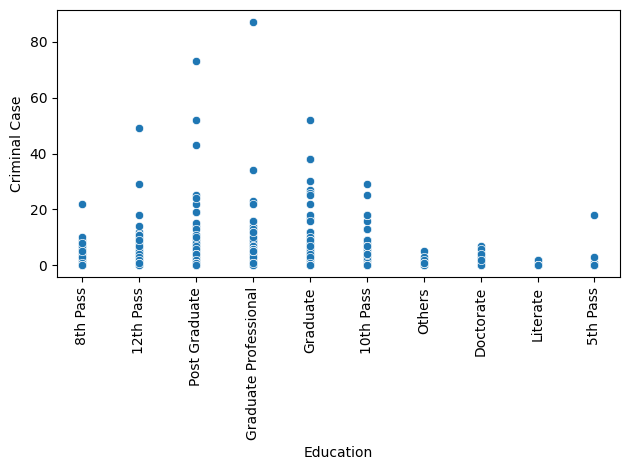

In [34]:
ax = sns.scatterplot(x="Education", y="Criminal Case", data=train_df_mod)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
# ax.figure.savefig("Crim_case_vs_Edu.png")

## Remove Outliers

In [35]:
train_df_mod.drop(train_df_mod.index[train_df_mod['Criminal Case'] > 60], inplace=True)
train_df_mod.drop(train_df_mod.index[train_df_mod['Liabilities'] > 4e9], inplace=True)
train_df_mod.drop(train_df_mod.index[train_df_mod['Total Assets'] > 4e9], inplace=True)
print(len(train_df_mod))

2053


## Percentage Distribution of Parties with the most criminal records

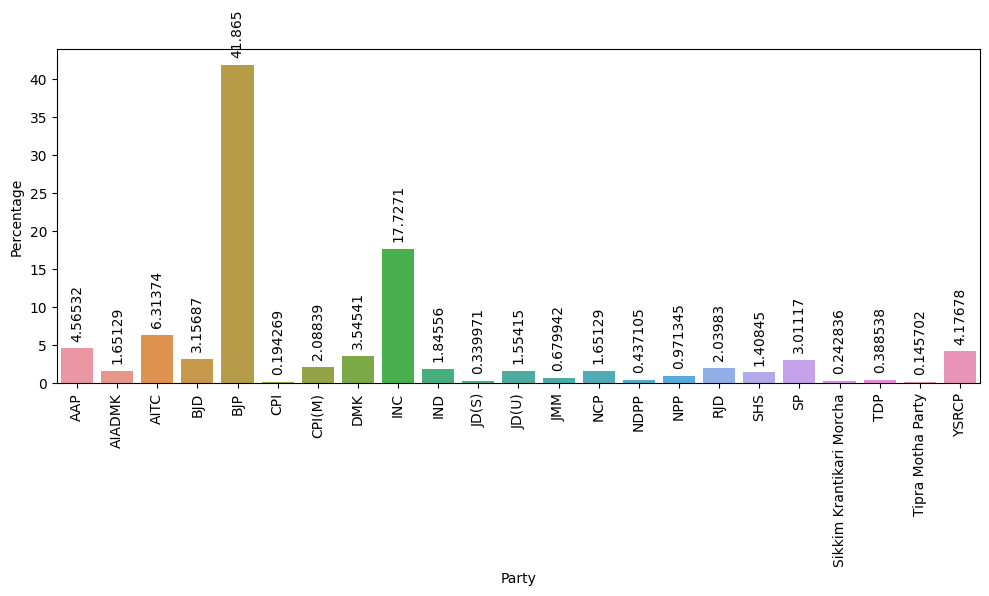

In [36]:
criminal_records = train_df_plot.groupby('Party')['Criminal Case'].sum().reset_index()
party_counts = train_df_plot['Party'].value_counts().reset_index()
party_counts.columns = ['Party', 'Count']
criminal_records = pd.merge(criminal_records, party_counts, on='Party')
criminal_records['Percentage'] = (criminal_records['Count'] / criminal_records['Count'].sum()) * 100

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Party', y='Percentage', data=criminal_records)
ax.bar_label(ax.containers[0], rotation=90, padding=5)
plt.xlabel("Party")
plt.ylabel("Percentage")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
# ax.figure.savefig("Fig1.png")

## Percentage Distribution of Parties with the most Wealthy Candidates

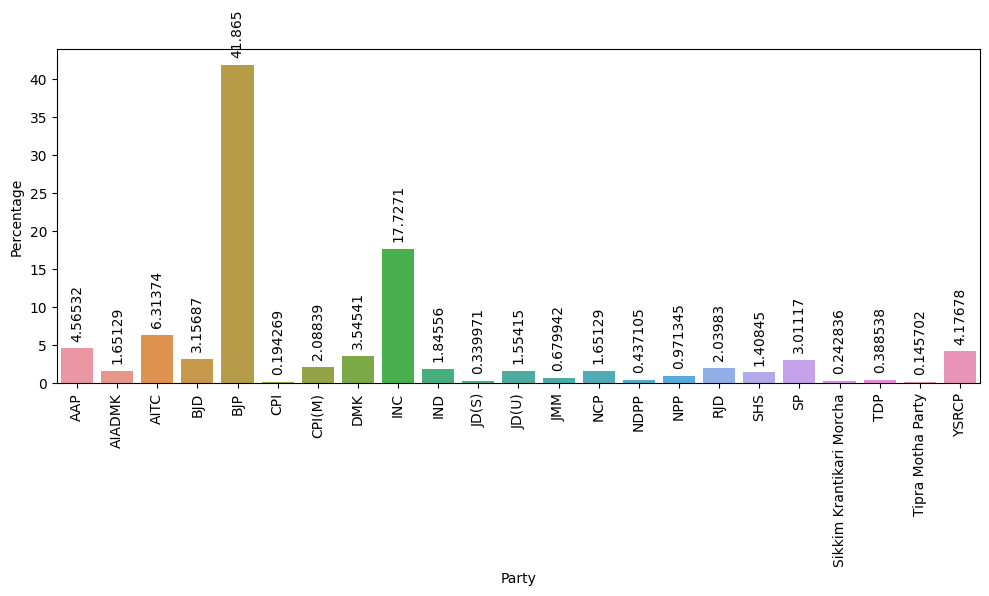

In [37]:
wealthy_candidates = train_df_plot.groupby('Party')['Total Assets'].sum().reset_index()
party_counts = train_df_plot['Party'].value_counts().reset_index()
party_counts.columns = ['Party', 'Count']
wealthy_candidates = pd.merge(wealthy_candidates, party_counts, on='Party')
wealthy_candidates['Percentage'] = (wealthy_candidates['Count'] / wealthy_candidates['Count'].sum()) * 100

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Party', y='Percentage', data=wealthy_candidates)
ax.bar_label(ax.containers[0], rotation=90, padding=5)
plt.xlabel("Party")
plt.ylabel("Percentage")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
# ax.figure.savefig("Fig2.png")

## Total Assets vs Liabilities

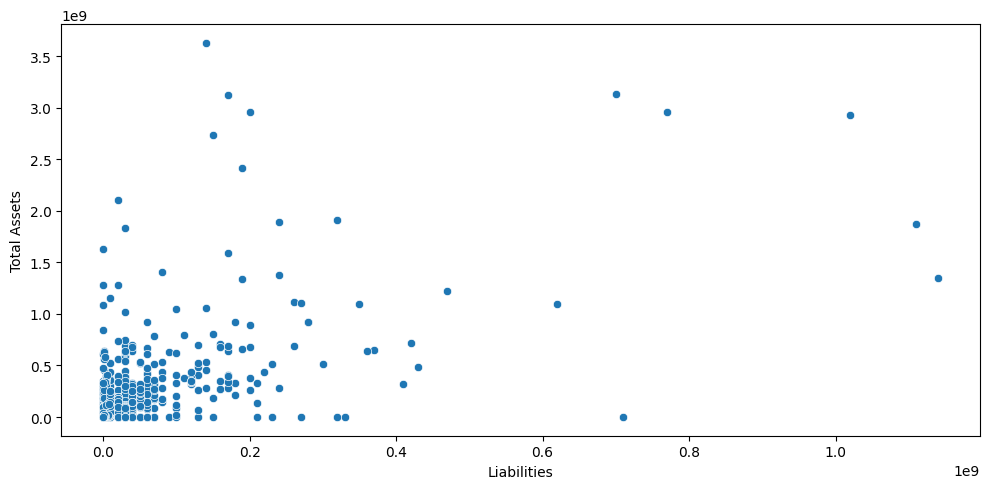

In [38]:
plt.figure(figsize=(10, 5))
ax = sns.scatterplot(x=train_df_mod['Liabilities'], y=train_df_mod['Total Assets'])
plt.xlabel("Liabilities")
plt.ylabel("Total Assets")
plt.tight_layout()
plt.show()
# ax.figure.savefig("Fig3.png")

# Label Encoding

In [39]:
train_df_mod['Education'] = le.fit_transform(train_df_mod['Education'])

train_df_mod.head()

,Criminal Case,Total Assets,Liabilities,Education,ANDHRA PRADESH,ARUNACHAL PRADESH,ASSAM,BIHAR,CHHATTISGARH,DELHI,...,NCP,NDPP,NPP,RJD,SHS,SP,Sikkim Krantikari Morcha,TDP,Tipra Motha Party,YSRCP
0,4,2110000000,20000000,3,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,0,10000000,0,1,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,0,70000000,2200000,9,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,0,90000000,2400000,9,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2,20000000,6100000,3,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# Preparing training and testing data

In [40]:
X = train_df_mod.drop(['Education'], axis=1)
X.head()

,Criminal Case,Total Assets,Liabilities,ANDHRA PRADESH,ARUNACHAL PRADESH,ASSAM,BIHAR,CHHATTISGARH,DELHI,GOA,...,NCP,NDPP,NPP,RJD,SHS,SP,Sikkim Krantikari Morcha,TDP,Tipra Motha Party,YSRCP
0,4,2110000000,20000000,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,0,10000000,0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,0,70000000,2200000,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,0,90000000,2400000,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2,20000000,6100000,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [41]:
y = train_df_mod['Education']
y.head()

0    3
1    1
2    9
3    9
4    3
Name: Education, dtype: int64

<Axes: >

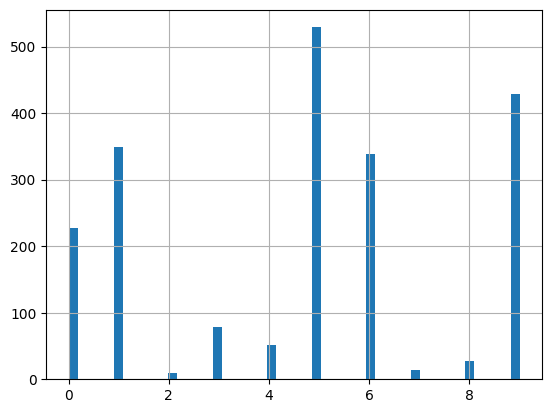

In [42]:
y.hist(bins=50)

In [43]:
scaler = StandardScaler()

X = scaler.fit_transform(X)
X

array([[ 0.56160957,  7.63514538,  0.04113047, ..., -0.05849196,
        -0.0382546 , -0.20909664],
       [-0.41673956, -0.33569454, -0.25965002, ..., -0.05849196,
        -0.0382546 , -0.20909664],
       [-0.41673956, -0.10795625, -0.22656417, ..., -0.05849196,
        -0.0382546 , -0.20909664],
       ...,
       [-0.41673956,  0.11978203, -0.13181831, ..., -0.05849196,
        -0.0382546 , -0.20909664],
       [-0.17215228,  0.5752586 , -0.11828319, ..., -0.05849196,
        -0.0382546 , -0.20909664],
       [-0.41673956, -0.36947572, -0.25965002, ..., -0.05849196,
        -0.0382546 , -0.20909664]])

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Optimising number of neighbours

In [45]:
cols_results=['Family','Model','F1 Score']
results = pd.DataFrame(columns=cols_results)
results

,Family,Model,F1 Score


In [46]:
kVals = range(1,30)
knn_names = ['KNN-'+str(k) for k in kVals]
for k in kVals:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    y_pred = knn.predict(X_test)
    new_row = pd.DataFrame([['KNN',knn_names[k-1],f1_score(y_test,y_pred,average='micro')]],columns=cols_results)
    results = pd.concat([results, new_row], ignore_index=True)
results[results.Family=='KNN']

/tmp/ipykernel_33/4270468334.py:9: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, new_row], ignore_index=True)


,Family,Model,F1 Score
0,KNN,KNN-1,0.165584
1,KNN,KNN-2,0.181818
2,KNN,KNN-3,0.163961
3,KNN,KNN-4,0.180195
4,KNN,KNN-5,0.209416
5,KNN,KNN-6,0.196429
6,KNN,KNN-7,0.199675
7,KNN,KNN-8,0.214286
8,KNN,KNN-9,0.198052
9,KNN,KNN-10,0.207792


In [47]:
knn = KNeighborsClassifier(n_neighbors=17)

model = knn.fit(X_train, y_train)
model

KNeighborsClassifier(n_neighbors=17)

# Testing the model

In [48]:
y_predict = model.predict(X_test)
y_predict

array([9, 5, 5, 9, 0, 9, 5, 5, 9, 9, 1, 5, 5, 9, 5, 5, 5, 1, 5, 9, 9, 9,
       5, 5, 0, 5, 5, 5, 6, 5, 1, 9, 1, 6, 6, 9, 5, 9, 1, 5, 1, 9, 0, 1,
       5, 9, 1, 5, 9, 6, 9, 1, 5, 9, 5, 1, 6, 6, 9, 9, 5, 1, 6, 9, 5, 9,
       1, 5, 9, 1, 1, 9, 9, 5, 6, 9, 6, 0, 6, 9, 5, 5, 6, 5, 9, 9, 0, 1,
       5, 5, 6, 5, 0, 5, 5, 0, 1, 5, 1, 6, 9, 9, 9, 5, 5, 5, 5, 5, 9, 0,
       1, 6, 6, 5, 5, 1, 6, 6, 6, 9, 5, 5, 5, 1, 9, 5, 6, 0, 5, 1, 9, 9,
       6, 5, 1, 5, 5, 9, 5, 5, 5, 1, 1, 9, 5, 9, 5, 5, 5, 6, 1, 5, 6, 5,
       5, 6, 9, 5, 0, 1, 9, 5, 5, 5, 9, 1, 5, 5, 9, 5, 5, 1, 9, 5, 6, 9,
       6, 5, 5, 5, 5, 9, 1, 5, 9, 5, 5, 9, 1, 5, 5, 0, 5, 1, 6, 9, 9, 5,
       1, 0, 0, 5, 1, 1, 1, 5, 5, 1, 5, 6, 0, 1, 5, 1, 1, 5, 0, 5, 5, 9,
       5, 6, 5, 9, 6, 1, 1, 5, 6, 6, 9, 6, 9, 6, 9, 5, 5, 6, 9, 6, 5, 6,
       1, 9, 1, 0, 3, 5, 6, 0, 5, 5, 1, 9, 9, 5, 0, 5, 5, 6, 5, 6, 5, 0,
       9, 1, 5, 5, 6, 0, 9, 9, 9, 1, 9, 9, 6, 5, 9, 1, 9, 9, 5, 5, 1, 5,
       5, 5, 9, 6, 6, 1, 6, 5, 6, 5, 6, 1, 1, 5, 1,

# Calculating the **F1** score

In [49]:
f1_score(y_test, y_predict, average=None).mean()

0.1073601941941339

# Cross Validation Score

In [50]:
cross_val_score(model, X_train, y_train).mean()

0.23174845141308556

# Accuracy

In [51]:
accuracy_score(y_test, y_predict)

0.23376623376623376

# Creating submission file

In [52]:
test_df_mod

,Criminal Case,Total Assets,Liabilities,ANDHRA PRADESH,ARUNACHAL PRADESH,ASSAM,BIHAR,CHHATTISGARH,DELHI,GOA,...,NCP,NDPP,NPP,RJD,SHS,SP,Sikkim Krantikari Morcha,TDP,Tipra Motha Party,YSRCP
0,2,700000000,110000000,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1,20000000,1300000,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,490000000,10000000,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
3,1,20000000,0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,0,160000000,20000000,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1369,0,10000000,0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1370,1,0,1300000,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1371,1,50000000,0,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1372,1,20000000,500000,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [53]:
X_final = test_df_mod
X_final = scaler.fit_transform(X_final)
X_final

array([[ 0.02151086,  1.0546743 ,  0.58361103, ..., -0.06622662,
        -0.03818018, -0.2080389 ],
       [-0.12776149, -0.19267555, -0.16507163, ..., -0.06622662,
        -0.03818018, -0.2080389 ],
       [ 0.17078322,  0.66946332, -0.10514947, ..., -0.06622662,
        -0.03818018, -0.2080389 ],
       ...,
       [-0.12776149, -0.13764541, -0.17402552, ..., -0.06622662,
        -0.03818018, -0.2080389 ],
       [-0.12776149, -0.19267555, -0.17058171, ..., -0.06622662,
        -0.03818018, -0.2080389 ],
       [-0.27703385, -0.06427189, -0.17402552, ..., -0.06622662,
        -0.03818018, -0.2080389 ]])

In [54]:
y_final = model.predict(X_final)
y_final = le.inverse_transform(y_final)
# X_final['Education'] = y_final
# X_final
test_df['Education'] = y_final
test_df.head()

,Party,Criminal Case,Total Assets,Liabilities,state,Education
0,IND,2,700000000,110000000,MAHARASHTRA,Graduate
1,AITC,1,20000000,1300000,WEST BENGAL,Post Graduate
2,NCP,3,490000000,10000000,MAHARASHTRA,12th Pass
3,AITC,1,20000000,0,WEST BENGAL,Post Graduate
4,SP,0,160000000,20000000,UTTAR PRADESH,Post Graduate


In [55]:
test_df['ID'] = test_df.index
test_df.head()

,Party,Criminal Case,Total Assets,Liabilities,state,Education,ID
0,IND,2,700000000,110000000,MAHARASHTRA,Graduate,0
1,AITC,1,20000000,1300000,WEST BENGAL,Post Graduate,1
2,NCP,3,490000000,10000000,MAHARASHTRA,12th Pass,2
3,AITC,1,20000000,0,WEST BENGAL,Post Graduate,3
4,SP,0,160000000,20000000,UTTAR PRADESH,Post Graduate,4


In [56]:
test_df[['ID','Education']].to_csv('prediction.csv',index=False)